In [2]:
# imports

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import mnist data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("Number of training examples:", mnist.train.num_examples)
print("Number of validation examples:", mnist.validation.num_examples)
print("Number of testing examples:", mnist.test.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Number of training examples: 55000
Number of validation examples: 5000
Number of testing examples: 10000


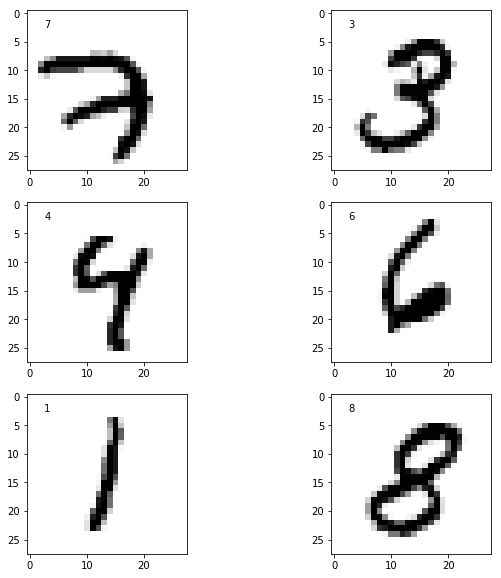

In [5]:
left= 2.5
top= 2.5

fig = plt.figure(figsize=(10,10))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])
    
    label = np.argmax(mnist.train.labels[i,:])
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

In [6]:
# define variables and placeholders

x = tf.placeholder(tf.float32, shape=[None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Prediction
Y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
# loss / cross entropy

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=Y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

In [12]:
# perform 1000 training steps

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [15]:
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels})

print("Test Accuracy: {0}%".format(test_accuracy * 100))

Test Accuracy: 90.72999954223633%


5441 Incorrect labels out of  55000


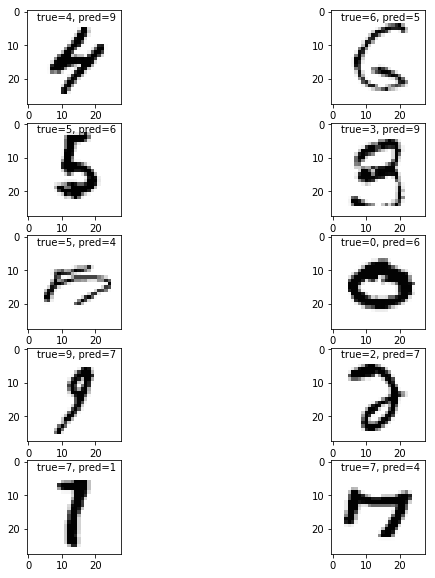

In [20]:
correct_vals = sess.run(correct_prediction, feed_dict={x: mnist.train.images, y_: mnist.train.labels})

pred_vals = sess.run(Y, feed_dict={x: mnist.train.images})

cntFalse = 0
for cv in correct_vals:
    if cv==False:
        cntFalse+=1
print(cntFalse, "Incorrect labels out of ", len(correct_vals))

fig = plt.figure(figsize=(10,10))

cntFalse = 0
for i, cv in enumerate(correct_vals):
    if cv==False:
        cntFalse += 1
        
        ax = fig.add_subplot(5, 2, cntFalse)
        im = np.reshape(mnist.train.images[i,:], [28, 28])
        
        label = np.argmax(mnist.train.labels[i,:])
        pred_label = np.argmax(pred_vals[i,:])
        
        ax.imshow(im, cmap='Greys')
        ax.text(left, top, 'true=' + str(label) + ', pred=' + str(pred_label))
        
        if cntFalse==10:
            break
            
sess.close()